# EDA: Data Visulisation and Analysis

---
Exploratory data analysis/visualization to gather relevant insights

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import pickle
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_pickle('../dataset/data_prepare1.pickle')
df.head()

,rating,reviews,happiness,ceo_approval,ceo_count,roles,salary,employees,industry,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,Management,Culture
1,3.4,437,NaN,57,199,"{'Workday HCM Consultant': '5.0', 'Software Te...",{'Customer Service Representative': '$29.97 pe...,8,Commodities,7,3.4,3.5,2.8,2.9,3.2
2,3.5,367,NaN,78,167,"{'Claims Examiner': '4.7', 'Office Assistant':...","{'Insurance Agent': '$48,284 per year', 'Agent...",7,Financials,7,3.7,3.3,3.2,3.1,3.3
3,4.2,803,"{'Work Happiness Score': '76', 'Appreciation':...",83,275,"{'Mentor': '5.0', 'Intern': '5.0', 'Security C...","{'Graduate Researcher': '$26,598 per year', 'R...",8,Govt_Services,7,4.0,3.7,3.6,3.7,4.0
4,4.1,501,"{'Work Happiness Score': '70', 'Learning': '81...",89,181,NaN,"{'Program Coordinator': '$48,016 per year', 'R...",8,Govt_Services,7,4.1,3.8,3.7,3.7,3.9
5,4.0,183,NaN,76,84,"{'Laboratory Assistant': '5.0', 'Senior Resear...",NaN,8,Commodities,9,4.0,3.7,3.4,3.6,3.9


## Statistical Summary for Predictor: Rating

In [3]:
rating = pd.DataFrame(df['rating'])
print("Data type : ", type(rating))
print("Data dims : ", rating.size)
rating.describe()


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  6476


,rating
count,6476.000000
mean,3.533879
std,0.423635
min,1.700000
25%,3.300000
50%,3.500000
75%,3.800000
max,5.000000


<AxesSubplot:>

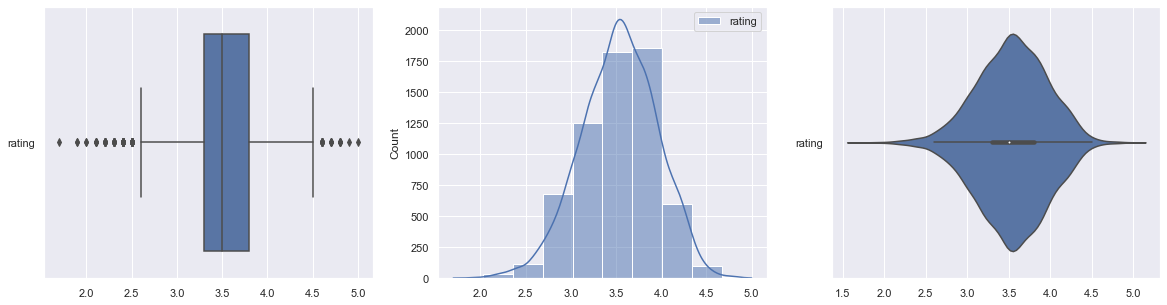

In [4]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
sb.boxplot(data = rating, ax=axs[0], orient = "h")
sb.histplot(rating, ax=axs[1], bins=10, kde=True)
sb.violinplot(data = rating, ax=axs[2], orient = "h")

---
## 1. Exploring Features (Numeric)
---
> Detailed Ratings of Company <br>
> Happiness-Related Ratings <br>
> `choose yourself` <br>

### 1.1 Detailed Ratings of Company
- Work/Life Balance
- Compensation/Benefits
- Job Security/Advancement
- Management
- Culture


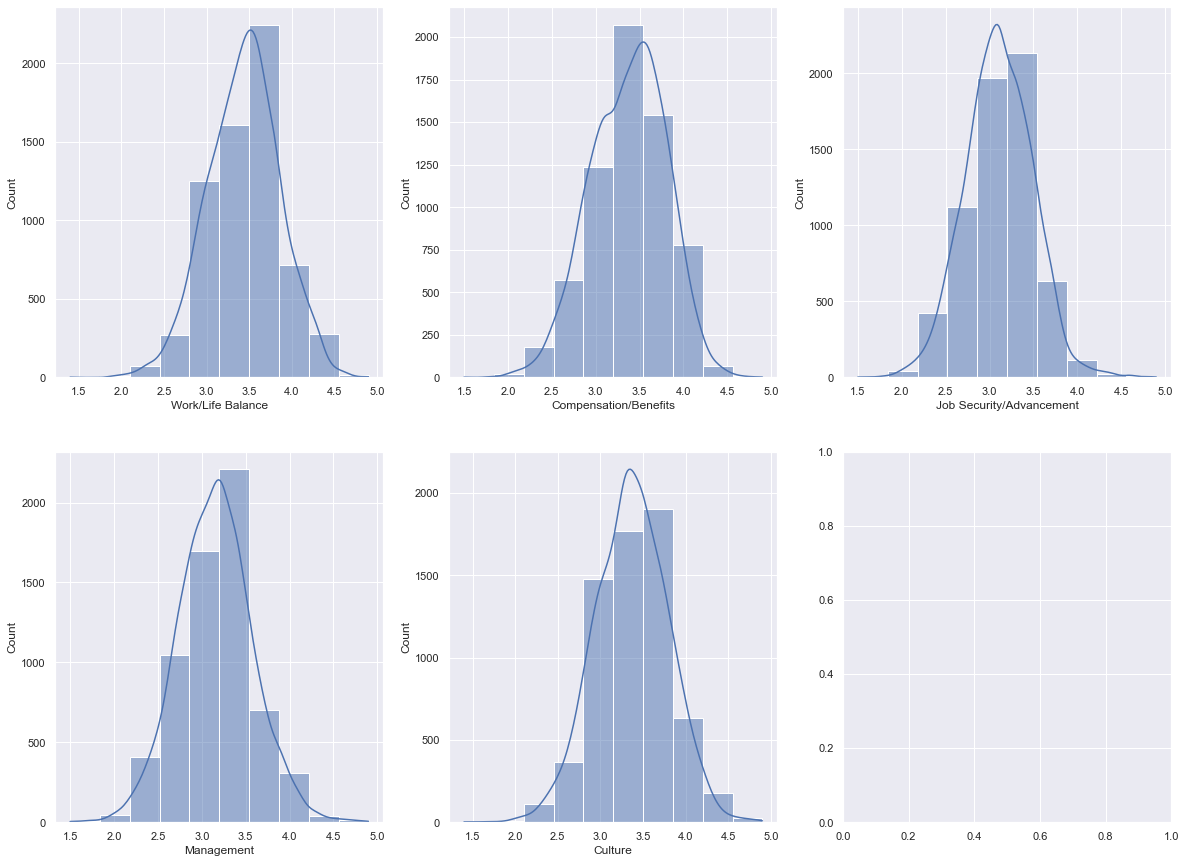

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(20,15))
col_index = 0
for i, col in enumerate(['Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 'Management', 'Culture']):
    row_index = int(i / 3)
    col_index = int(i - (row_index * 3) )
    sb.histplot(df[col], bins=10, ax=axs[row_index,col_index], kde=True)
    #col_index = 0 if col_index else 1


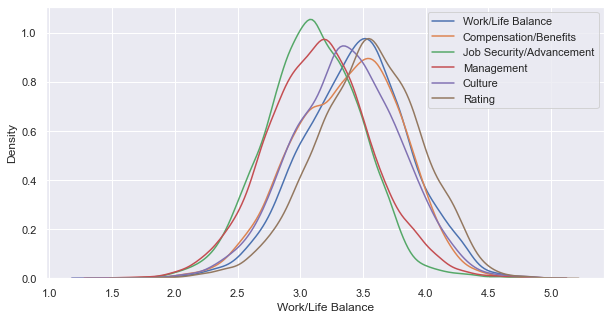

In [6]:
fig, axs = plt.subplots(figsize=(10,5))
for i, col in enumerate(['Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 'Management', 'Culture']):
    sb.kdeplot(df[col], label=col)
    
sb.kdeplot(df['rating'], label='Rating')
plt.legend()

### Discoveries:
As expected, the company-related ratings (worklife balance, compensation, advancement, management, culture) have similar distribution as rating (predictor), leading to the further exploration on their correlations.

<AxesSubplot:>

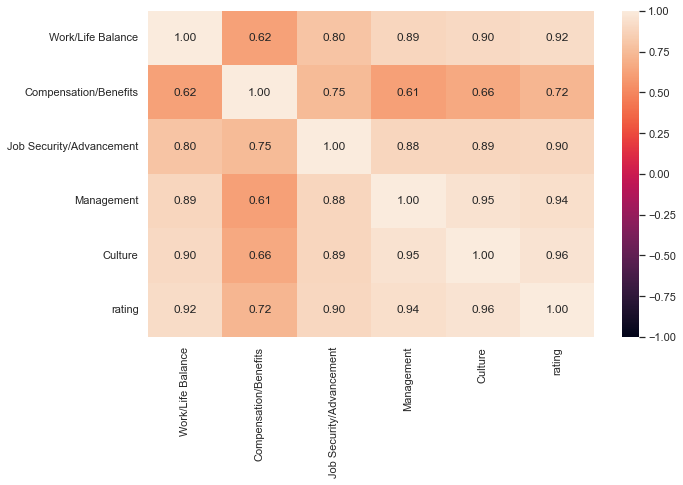

In [7]:
fig, axs = plt.subplots(figsize=(10,6))
jointDF_rating = pd.concat([df['Work/Life Balance'],
                               df['Compensation/Benefits'],
                               df['Job Security/Advancement'],
                               df['Management'],
                               df['Culture'],
                               df['rating'],], axis = 1).reindex()
sb.heatmap(jointDF_rating.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Discoveries:
Surprisingly, all perspectives have strong positive correlation (>=0.9) with company ratings except the compensation/benefit (0.72). 
- So, which feature has the heaviest weightage in affecting company's rating?

---

### 1.2. Happiness-Related Ratings
- Work Happiness Score
- Appreciation
- Purpose
- Learning
- Support
- Achievement
- Flexibility
- Trust
- Energy
- Inclusion
- Belonging
- Management
- Compensation

In [8]:
df2 = pd.read_pickle('../dataset/data_prepare2.pickle')
df2.head()

,rating,reviews,employees,industry,revenue,Work Happiness Score,Appreciation,Purpose,Learning,Support,Achievement,Flexibility,Trust,Energy,Inclusion,Belonging,Compensation
1,4.2,803,8,Govt_Services,7,76,81,79,78,77,75,74,72,72,72,70,68
2,4.1,501,8,Govt_Services,7,70,78,79,81,76,76,77,70,76,74,71,66
3,3.9,167,8,Leisure,5,71,73,77,71,70,73,69,67,73,66,68,64
4,2.7,541,7,Information Technology,4,45,49,52,52,52,57,53,45,43,50,40,40
5,3.2,271,7,Real_Estate,7,60,62,62,65,60,67,67,57,64,55,56,58


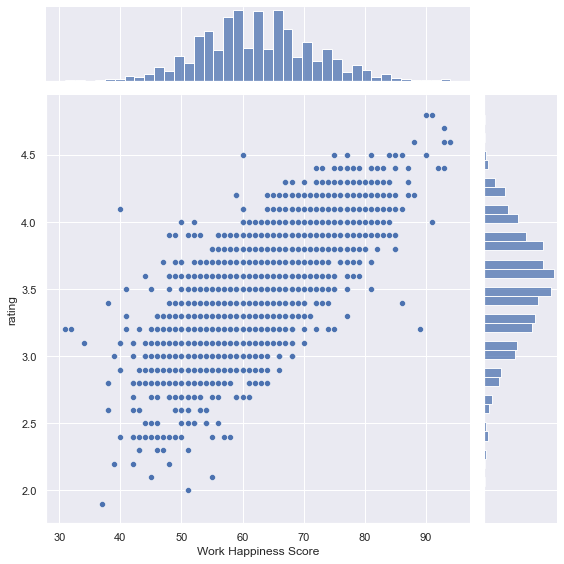

In [9]:
sb.jointplot(data = df2, x='Work Happiness Score', y='rating', height = 8)

In [10]:
# Calculate the correlation between the two columns/variables
pd.concat([df2['Work Happiness Score'],df2['rating']], axis = 1).reindex().corr()

,Work Happiness Score,rating
Work Happiness Score,1.000000,0.758429
rating,0.758429,1.000000


<AxesSubplot:>

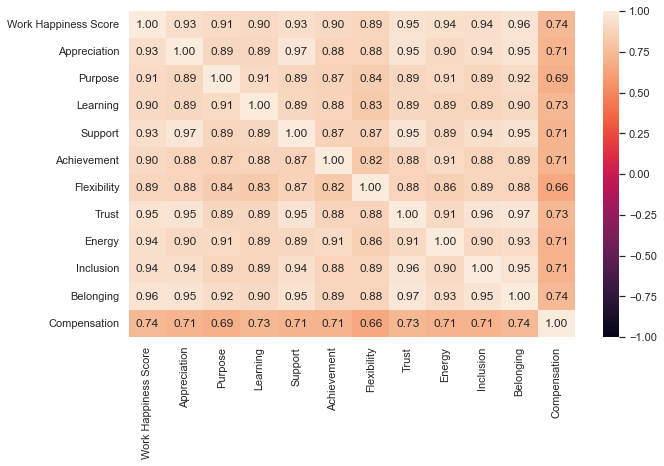

In [11]:
jointDF_rating2 = pd.concat([df2['Work Happiness Score'],
                            df2['Appreciation'],
                            df2['Purpose'],
                            df2['Learning'],
                            df2['Support'],
                            df2['Achievement'],
                            df2['Flexibility'],
                            df2['Trust'],
                            df2['Energy'],
                            df2['Inclusion'],
                            df2['Belonging'],
                            df2['Compensation']
                           ], axis = 1).reindex()

fig, axs = plt.subplots(figsize=(10,6))
sb.heatmap(jointDF_rating2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Discoveries:
1. The working happiness has strong positive correlation with company rating, corr = `0.758429`
2. The working happiness are found to have strong positive correlation with many aspects, except compensation `0.66` only, aligning with our discoveries in 1.1

---

### 1.3. Salaries / CEO (approvals) / reviews

if you choose salaries, then need to handle the data (take average per week for all) <br>
if you choose ceo approvals, i think it may be easy, just see the trend (bi-variate) <br>
if you chooes reviews, it will be easy, but i dont think these 2 are related tho 

---
---

## 2. Exploring Features (Categorical)
> Employees (Company Size) <br>
> Company Revenue <br>
> Industry <br>

----

### 2.1. Employees (Company Size)
| Label  |Description       | Count       |    
| :---                | :---: | :----: |       
| 1   |  1             |    6    |            
| 2   |  2 to 10       |   66    |   
| 3   |  11 to 50      |   101   |       
| 4   |  51 to 200     |   365   |       
| 5   | 201 to 500     |   755   |       
| 6   | 501 to 1,000   |   954   |       
| 7   |1,001 to 5,000  |   2135  |       
| 8   |5,001 to 10,000 |   734   | 
| 9   |  10,000+       |   1360  | 

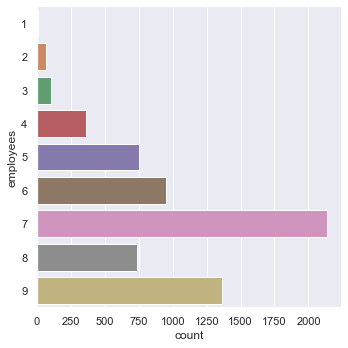

In [12]:
sb.catplot(y='employees', data=df, kind='count')

[Text(0.5, 1.0, 'Rating v.s. Company size')]

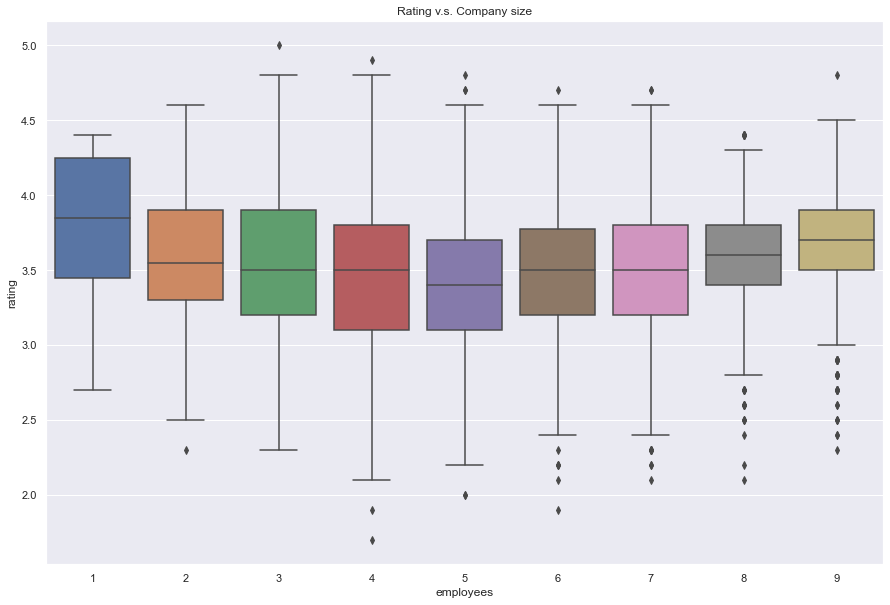

In [13]:
f, axes = plt.subplots(figsize=(15, 10))
sb.boxplot(x = 'employees', y = 'rating', data = df).set(title='Rating v.s. Company size')

### Discoveries:
It seems like the small (1 employee) and large (10,000+) size of companies have slight higher ratings compared. 
> Let's ignore small size company since the ratings may from the founder himself / herself, lacking objectivity, and the data size is quite small <br>
> For large company having higer ratings, we wonder whether the higer company revenue would lead to better ratings.

### 2.1. Revenue (Company Financial Condition)
| Label  |Description       | Count       |    
| :---                | :------: | :--------: |    
| 1   |  less than 1M (USD)  |    233 |            
| 2   |  1 to 5M (USD)      |    298 |   
| 3   |  5M to 25M (USD)    |    667 |       
| 4   |  25M to 100M (USD) |    1127|       
| 5   |  100M to 500M (USD) |   1541 |       
| 6   |  500M to 1B (USD)   |   626  |       
| 7   |  1B to 5B (USD)     |   1169 |       
| 8   |  5B to 10B (USD)    |   306  | 
| 9   |  more than 10B (USD) |   509  | 

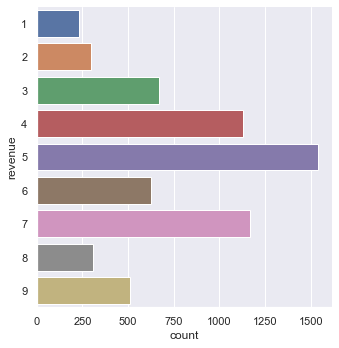

In [14]:
sb.catplot(y='revenue', data=df, kind='count')

[Text(0.5, 1.0, 'Rating v.s. Company Revenue')]

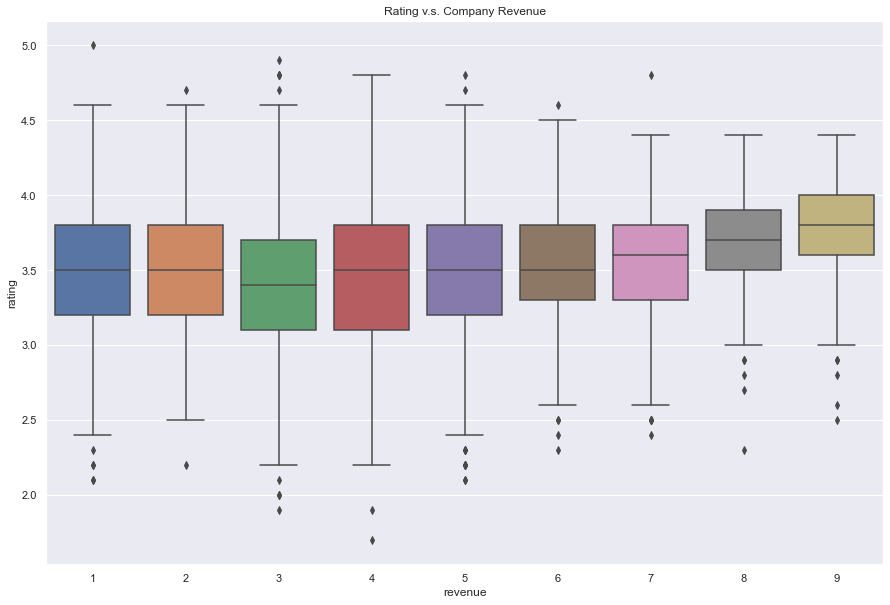

In [15]:
f, axes = plt.subplots(figsize=(15, 10))
sb.boxplot(x = 'revenue', y = 'rating', data = df).set(title='Rating v.s. Company Revenue')

### Discoveries:
There is slight increase of ratings when revenue increases, however, due to the uneven distribution of number of datapoints among different categories, this finding may not be objective. And the difference is not very distinguishing.

### 2.3. Industry 
We then explore the difference of ratings among industries, and relate them with other features
- Financials
- Leisure
- Healthcare_NGO
- Telecomm
- Govt_Services
- Tech
- Commodities
- FNB
- Retail
- Real_Estate